### 2 Monte-carlo integration

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def integral(N):
    points = np.random.uniform(1,3,100) #Sample uniform points between 1 and 3

    values = points**2*np.sin(points) # Calulate g(x)

    integral = values.mean() #Take mean this gives approximation of integral

    return integral

print(integral(100))


2.7369284411804187


Mean = 2.776067847496843, STD = 0.09706086747536352


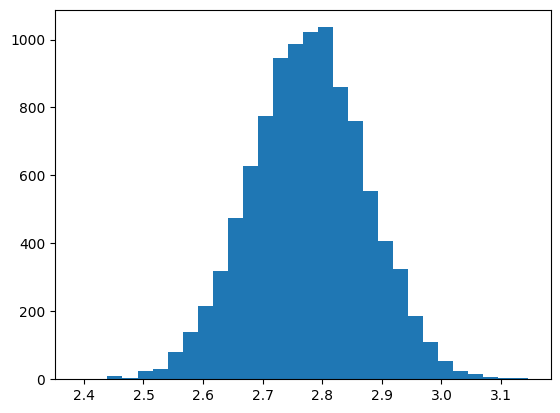

In [17]:
K = 10000
N = 100

integrals = np.zeros(K)

for i in range(K):   
    integrals[i] = integral(N)

plt.hist(integrals, bins=30)

print(f'Mean = {integrals.mean()}, STD = {integrals.std()}')


### 3 ITM and monte carlo integration

In [42]:
from scipy import stats as st

In [94]:
def Finverse(x):
    return (-8*np.log(1-x))**(1/2) #Inverse of the weibull CDF 


def windspeed(N): #Sampling windspeed using ITM
    X = np.random.rand(N)
    windspeeds = Finverse(X)
    return windspeeds

def powergen(windspeed): # Calculating powergen from windspeed
    if windspeed < 3:
        return 0
    elif windspeed >= 3 and windspeed < 12:
        return (2*(windspeed-3))/9
    elif windspeed >= 12 and windspeed < 25:
        return 2
    else:
        return 0
    
def DEPsim(N): #Simulating the daily energy production of all 200 turbines
    DEPS = np.zeros(N)

    for i in range(N):

        windspeeds = windspeed(24)
        power = 0
        for speed in windspeeds:
            power += powergen(speed)

        DEPS[i] = power*200
    return DEPS

Expected DEP 361MWh, 95% confidence interval 352 < DEP < 371MWh estimated error 18MWh


Text(0.5, 0, 'MWh per day')

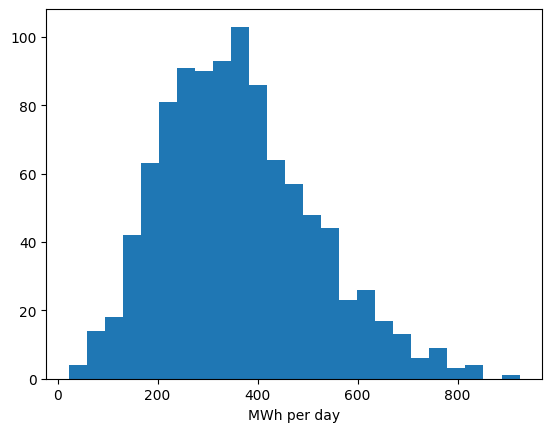

In [96]:
DEPs = DEPsim(1000)

interval = st.t.interval(0.95, 1000, DEPs.mean(), st.sem(DEPs))

print(f'Expected DEP {int(DEPs.mean())}MWh, 95% confidence interval {int(interval[0])} < DEP < {int(interval[1])}MWh estimated error {int(interval[1]-interval[0])}MWh')

plt.hist(DEPs, bins=25)
plt.xlabel('MWh per day')


In [86]:
sigma = DEPs.std()

n = (1.96*-2*sigma)**2

print(f'Number of iterations needed for one wide 95% confidence interval {int(np.ceil(n))}')


Number of iterations needed for one wide 95% confidence interval 3123982
